# Artificial Intelligence exam project

Initial imports:

In [1]:
import matplotlib.pyplot as plt
import IPython.display as display
from utils import *
from heuristic_FD import *

In [2]:
state = env.reset()
env.render() 
print(env.actions)


Hello Agent, welcome to NetHack!  You are a neutral human Caveman.              
                                                                                
                                                                                
                                                                                
                                ...............                                 
                                ..........k....                                 
                                ...............                                 
                                ...............                                 
                                ...............                                 
                                ...............                                 
                                ...@...........                                 
                                ...............                                 
                           

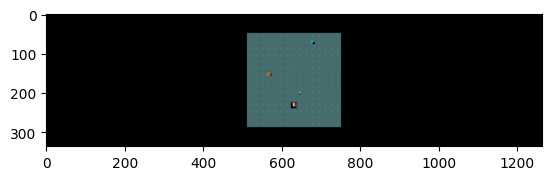

In [3]:
game_map = state['chars']
game = state['pixel']
plt.imshow(state['pixel'])

In [4]:
start = get_player_location(game_map)
end_target = get_target_location(game_map)
weapons = get_weapon_location(game_map)
print("Agent position:", start)
print("Target position:", end_target)
print("Monster position:", get_monster_location(game_map))
print("Weapon position:", weapons)
print("Other actions:", OTHER_ACTIONS[8])
print("Other actions:", OTHER_ACTIONS[9])

Agent position: (9, 35)
Target position: (14, 39)
Monster position: [(4, 42)]
Weapon position: [(12, 40)]
Other actions: Command.PICKUP
Other actions: Command.WIELD


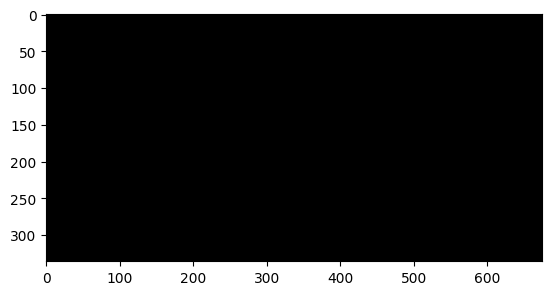

In [5]:
player_moves = [start]
image = plt.imshow(game[:, 300:975])

#finchè non arriviamo alla soluzione
end_state=False
hp=12
weapons_in_inventory=0

while not end_state:
    current_position = get_player_location(game_map)

    if len(weapons)!= 0 and current_position == weapons[0]: #if i'm on a weapon
        pickup() #pick up the weapon
        weapons_in_inventory+=1 #add it to the inventory
    
    weapons = get_weapon_location(game_map) #update the weapon position
    coord = get_best_move(game_map, current_position, end_target, heuristic_fd, hp) #get the best move according to the heuristic
    
    #print updated step
    game_map, x, end_state, y = env.step(actions_from_path(current_position,[coord])[0])
    hp=game_map["blstats"][10]
    # print("health points: ",hp)
    game_map=plot_map(game_map,image)
    player_moves.append(coord)
    
# lista passi effettuati
sol = actions_from_path(player_moves[0], player_moves[1:])

